<a href="https://colab.research.google.com/github/geharpz/07MIAR/blob/colab/07miar_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. El/La alumnx deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

In [ ]:
#El primer paso es asegurar que tenemos instalada la API de Kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110683 sha256=9c990e7391c63ad19c5779fcf7aaa063427028d56c910866fc9fc034786a8905
  Stored in directory: /root/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, Dropout, Flatten, Dense
from keras.layers import Activation, BatchNormalization, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from google.colab import files

#Función para descargar el dataset de Kaggle.
#Ejecutar solamente sino se han descargado previamente.
def download_dataset():
  !rm -Rf ~/.kaggle kaggle.json dataset/
  #Se pide subir el token de la API de Kaggle
  files.upload()
  #Se crea directorio de trabajo de Kaggle
  !mkdir ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json
  !kaggle datasets download -d gpiosenka/100-bird-species
  !mkdir dataset
  !unzip -qq 100-bird-species.zip -d dataset

#download_dataset()

Saving kaggle.json to kaggle.json
100% 1.95G/1.96G [00:54<00:00, 40.0MB/s]
100% 1.96G/1.96G [00:54<00:00, 38.4MB/s]


In [ ]:
#Variables de interes
train_directory = 'dataset/train'
test_directory = 'dataset/test'
validation_directory = 'dataset/valid'
batch_size = 128
img_size = 224

## Importar datos y visualizarlos.

In [ ]:
#Carga de datos de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15)

validation_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical')

#Carga de datos de validacación
validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical')

#Carga de datos de test
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical')


Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


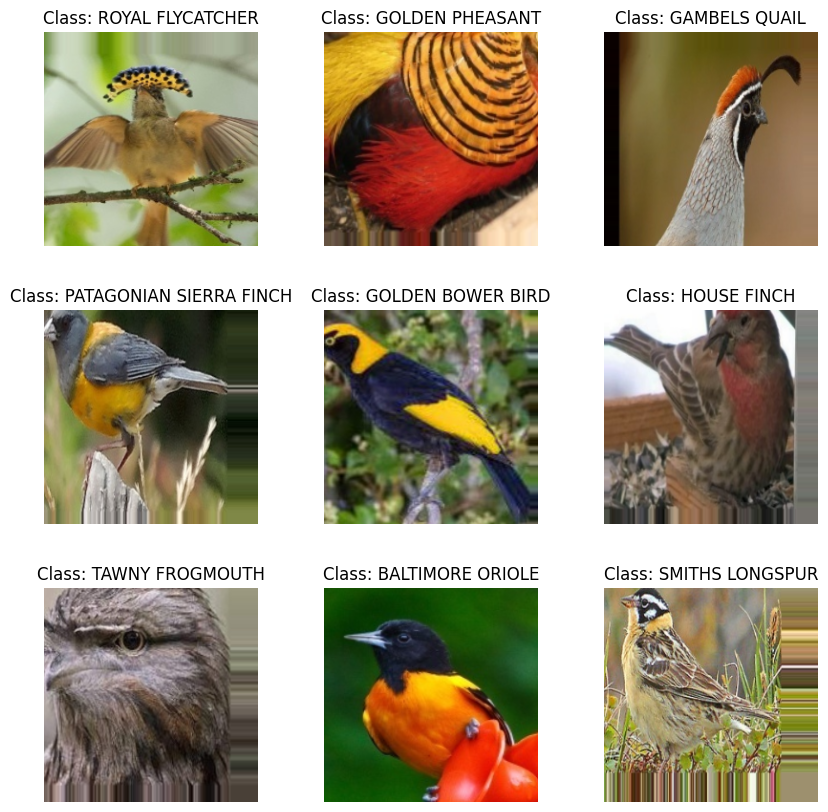

In [ ]:
#Sample de las imagenes a clasificar
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (10 , 10))

for i in range(9):
    plt.subplot(3 , 3, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")


## Modelo from scratch

In [ ]:
##### Se crea modelo from scratch ######
#Input Layer
scratch_model_in = Input(shape=(img_size, img_size, 3))

#Layer 1
scratch_model_layer1 = Conv2D(32,
                              (3, 3),
                              padding="same",
                              activation="relu")(scratch_model_in)
scratch_model_layer1 = BatchNormalization()(scratch_model_layer1)

scratch_model_layer1 = Conv2D(32,
                              (3, 3),
                              padding="same",
                              activation="relu")(scratch_model_layer1)
scratch_model_layer1 = BatchNormalization()(scratch_model_layer1)

scratch_model_layer1 = MaxPooling2D(pool_size=(2, 2))(scratch_model_layer1)
scratch_model_layer1 = Dropout(0.15)(scratch_model_layer1)

#Layer 2
scratch_model_layer2 = Conv2D(64,
                              (3, 3),
                              padding="same",
                              activation="relu")(scratch_model_layer1)
scratch_model_layer2 = BatchNormalization()(scratch_model_layer2)

scratch_model_layer2 = Conv2D(64,
                              (3, 3),
                              padding="same",
                              activation="relu")(scratch_model_layer2)
scratch_model_layer2 = BatchNormalization()(scratch_model_layer2)

scratch_model_layer2 = MaxPooling2D(pool_size=(2, 2))(scratch_model_layer2)
scratch_model_layer2 = Dropout(0.15)(scratch_model_layer2)

#Layer 3
scratch_model_layer3 = Conv2D(128,
                              (3, 3),
                              padding="same",
                              activation="relu")(scratch_model_layer2)
scratch_model_layer3 = BatchNormalization()(scratch_model_layer3)

scratch_model_layer3 = Conv2D(128,
                              (3, 3),
                              padding="same",
                              activation="relu")(scratch_model_layer3)
scratch_model_layer3 = BatchNormalization()(scratch_model_layer3)

scratch_model_layer3 = MaxPooling2D(pool_size=(2, 2))(scratch_model_layer3)
scratch_model_layer3 = Dropout(0.15)(scratch_model_layer3)

#Layer 4
scratch_model_layer4 = Conv2D(256,
                              (3, 3),
                              padding="same",
                              activation="relu")(scratch_model_layer2)
scratch_model_layer4 = BatchNormalization()(scratch_model_layer3)

scratch_model_layer4 = Conv2D(256,
                              (3, 3),
                              padding="same",
                              activation="relu")(scratch_model_layer3)
scratch_model_layer4 = BatchNormalization()(scratch_model_layer4)

scratch_model_layer4 = MaxPooling2D(pool_size=(2, 2))(scratch_model_layer4)
scratch_model_layer4 = Dropout(0.15)(scratch_model_layer4)

#Top Model
xfc = Flatten()(scratch_model_layer4)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.3)(xfc)
# Clasificador softmax
predictions = Dense(525, activation="softmax")(xfc) #(X)
#Crea modelo y se visualiza
scratch_model = Model(inputs=scratch_model_in, outputs=predictions)
scratch_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0     

In [ ]:
opt = Adam(learning_rate=0.001)
scratch_model.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
history=scratch_model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
662/662 [==============================] - 1226s 2s/step - loss: 4.5566 - accuracy: 0.1305 - val_loss: 3.1349 - val_accuracy: 0.3223
Epoch 2/10
662/662 [==============================] - 1223s 2s/step - loss: 2.8620 - accuracy: 0.3669 - val_loss: 1.8845 - val_accuracy: 0.5558
Epoch 3/10
662/662 [==============================] - 1216s 2s/step - loss: 2.0993 - accuracy: 0.5114 - val_loss: 1.4542 - val_accuracy: 0.6446
Epoch 4/10
662/662 [==============================] - 1198s 2s/step - loss: 1.6761 - accuracy: 0.5975 - val_loss: 1.5721 - val_accuracy: 0.6606
Epoch 5/10
662/662 [==============================] - 1201s 2s/step - loss: 1.4227 - accuracy: 0.6519 - val_loss: 1.9704 - val_accuracy: 0.6183
Epoch 6/10
662/662 [==============================] - 1290s 2s/step - loss: 1.2468 - accuracy: 0.6908 - val_loss: 1.0228 - val_accuracy: 0.7528
Epoch 7/10
662/662 [==============================] - 1224s 2s/step - loss: 1.1088 - accuracy: 0.7188 - val_loss: 0.8739 - val_accuracy:

In [ ]:
#Se guarda el modelo from scratch para poder ultizarlo si es necesario
from google.colab import drive
from sklearn.metrics import classification_report

drive.mount('/content/drive/', force_remount=True)
BASE_FOLDER = '/content/drive/My Drive/MIAR07/'
#scratch_model.save(BASE_FOLDER+"scratch_model.h5") #(X)


Mounted at /content/drive/


21/21 [==============================] - 6s 303ms/step


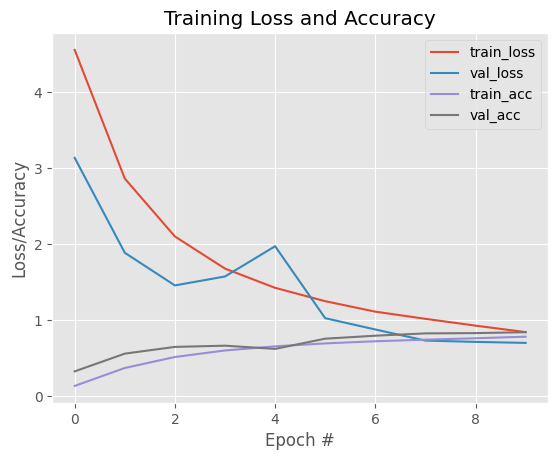

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Se puede observar que el modelo from scratch sufre de underfitting. Pero no es algo concluyente ya que la cantidad de epocas entrenado podría ser superior. Es decir, aún pueden bajar mas las funciones de error y posiblemente converger más cerca. Debido a la cantidad de tiempo de entrenamiento que se necesita no se ha ejecutado más tiempo.

In [ ]:
# Evaluación del modelo
y_test = test_generator.classes
y_pred = scratch_model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

# Sacamos el report para test
#print(classification_report(y_test, y_pred)) #(X)
scratch_model.evaluate(test_generator)


21/21 [==============================] - 6s 286ms/step - loss: 0.6971 - accuracy: 0.8381


[0.6971435546875, 0.8380952477455139]

Se obtiene una accuracy del 83% con este modelo lo cual no es un mal resultado.
De todas formas realizando fine-tuning y transfer learning podemos mejorar.

##Fine-tuning & Tranfer learning.

### <b>Funciones de validación de los modelos</b>

In [ ]:
def show_perfomance_model(history):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()


def prediction_model(tg,model):
  # Evaluación del modelo
  g_dict = tg.class_indices
  y_test = tg.classes
  y_pred = model.predict(tg)
  y_pred = np.argmax(y_pred,axis=1)

  # Sacamos el report para test
  print(classification_report(y_test, y_pred, target_names=list(g_dict.keys()))) #(X)
  model.evaluate(tg)

In [ ]:

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation
def resnet_block(input_data, filters, kernel_size):
    """
    Crea un bloque ResNet, una estructura fundamental en las arquitecturas de redes neuronales ResNet.

    Parámetros:
    - input_data: Tensor, entrada al bloque ResNet.
    - filters: int, número de filtros en las capas convolucionales.
    - kernel_size: int o tuple, tamaño del kernel para las capas convolucionales.

    Retorna:
    - x: Tensor, salida del bloque ResNet.
    """

    x = layers.Conv2D(filters, kernel_size=kernel_size, activation='relu', padding='same')(input_data)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, kernel_size=kernel_size, activation=None, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, input_data])  # Conexión residual
    x = layers.Activation('relu')(x)
    return x

def resnet_training(augmentation_layer, tr, vr, shape, filter, kernel_size, activation, activation2, epoch, padding, pooling, name, lr, b1, b2, e):
    """
    Construye, compila y entrena un modelo ResNet personalizado.

    Parámetros:
    - shape: tuple, forma de las entradas al modelo.
    - filter: int, número de filtros en la primera capa convolucional.
    - kernel_size: int o tuple, tamaño del kernel para las capas convolucionales.
    - activation: str, función de activación para las capas convolucionales.
    - activation2: str, función de activación para la capa de salida.
    - epoch: int, número de épocas para el entrenamiento.
    - padding: str, tipo de relleno para las capas convolucionales.
    - pooling: int o tuple, tamaño de la ventana de pooling para MaxPooling2D.
    - name: str, nombre para guardar el modelo entrenado.
    - lr: float, tasa de aprendizaje para el optimizador.
    - b1, b2, e: float, parámetros para el optimizador Adam.

    Retorna:
    - history: Historial de entrenamiento del modelo.
    """

    inputs = Input(shape=shape)
    x = inputs
    if augmentation_layer is not None:
        x = augmentation_layer(x)
    x = Rescaling(scale=1.0 / 255.0)(x)

    x = layers.Conv2D(32, kernel_size=kernel_size, padding=padding, activation=activation)(x)
    x = layers.Conv2D(32, kernel_size=kernel_size, padding=padding, activation=activation)(x)
    x = layers.MaxPooling2D(pool_size=pooling)(x)
    x = Dropout(0.20)(x)

    # Aplicar bloques ResNet
    for _ in range(2):  # Ajusta el número de bloques según sea necesario
        x = resnet_block(x, 32, kernel_size)

    x = layers.Conv2D(64, kernel_size=kernel_size, padding=padding, activation=activation)(x)
    x = BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=pooling)(x)
    x = Dropout(0.20)(x)
    x = layers.Conv2D(64, kernel_size=kernel_size, padding=padding, activation=activation)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=pooling)(x)
    x = Dropout(0.20)(x)
    x = layers.Conv2D(128, kernel_size=kernel_size, padding=padding, activation=activation)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=pooling)(x)
    x = Dropout(0.20)(x)
    x = layers.Conv2D(256, kernel_size=kernel_size, padding=padding, activation=activation)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=pooling)(x)
    x = Dropout(0.20)(x)
    x = layers.Conv2D(256, kernel_size=kernel_size, padding=padding, activation=activation)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=pooling)(x)
    x = Dropout(0.20)(x)
    x = layers.Conv2D(512, kernel_size=kernel_size, padding=padding, activation=activation)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=pooling)(x)
    x = Dropout(0.25)(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(525, activation=activation2)(x)

    resnet_model = models.Model(inputs, outputs)

    # Compilación del modelo con optimizador Adam y entrenamiento
    #Adam(learning_rate=lr, beta_1=b1, beta_2=b2, epsilon=e)
    resnet_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
    history = resnet_model.fit(tr, validation_data=vr,  batch_size=32, epochs=epoch, callbacks=[
            ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1),
            EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
        ])

    # Guardar el modelo
    resnet_model.save(f'{BASE_FOLDER}{name}.h5')
    return history

# Definición de la secuencia de aumento de datos
def augment(flip):
    """
    Define un modelo de aumentación de datos para mejorar la generalización del modelo.

    Retorna:
    - Modelo de Keras con capas de aumentación.
    """
    return tf.keras.Sequential([
        layers.experimental.preprocessing.RandomFlip(flip),
        layers.experimental.preprocessing.RandomRotation(0.15),
        layers.experimental.preprocessing.RandomZoom(0.12),
        layers.experimental.preprocessing.RandomContrast(0.12),
    ], name='AugmentationLayer')

shape = (224, 224, 3)  # Dimensiones de la imagen (alto, ancho, canales de color)

In [ ]:
augment1 = augment("horizontal")

In [ ]:
history1= resnet_training(augment1,train_generator,test_generator,shape, 32,(3,3), 'relu', 'softmax', 10, 'same', (2,2), 'res_net1',0.01,0.99,0.999,1e-06)

Epoch 1/10
662/662 [==============================] - 950s 1s/step - loss: 6.0110 - accuracy: 0.0096 - val_loss: 20.2775 - val_accuracy: 0.0034 - lr: 0.0010
Epoch 2/10
662/662 [==============================] - 947s 1s/step - loss: 5.0643 - accuracy: 0.0536 - val_loss: 7.7335 - val_accuracy: 0.0133 - lr: 0.0010
Epoch 3/10
662/662 [==============================] - 962s 1s/step - loss: 4.2040 - accuracy: 0.1485 - val_loss: 4.8387 - val_accuracy: 0.1158 - lr: 0.0010
Epoch 4/10
662/662 [==============================] - 956s 1s/step - loss: 3.4929 - accuracy: 0.2531 - val_loss: 5.6017 - val_accuracy: 0.0830 - lr: 0.0010
Epoch 5/10
662/662 [==============================] - 943s 1s/step - loss: 3.0282 - accuracy: 0.3323 - val_loss: 3.6795 - val_accuracy: 0.2396 - lr: 0.0010
Epoch 6/10
662/662 [==============================] - 935s 1s/step - loss: 2.7054 - accuracy: 0.3907 - val_loss: 3.3008 - val_accuracy: 0.3025 - lr: 0.0010
Epoch 7/10
662/662 [==============================] - 942s 1s/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


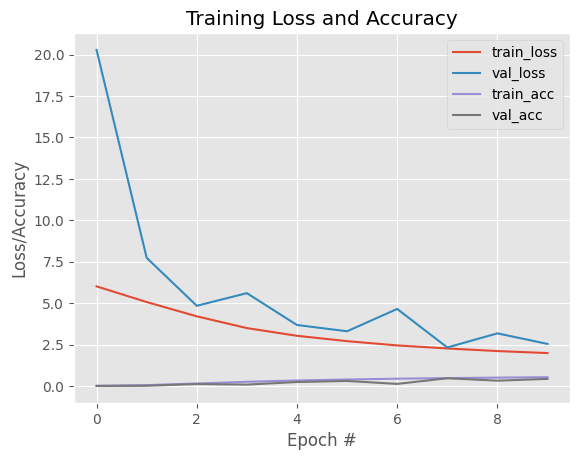

In [ ]:
show_perfomance_model(history1)

In [ ]:
from tensorflow.keras.models import load_model
model_resnet_customer = load_model(f'{BASE_FOLDER}res_net1.h5')

In [ ]:
prediction_model(test_generator,model_resnet_customer)

21/21 [==============================] - 5s 242ms/step
                               precision    recall  f1-score   support

              ABBOTTS BABBLER       0.50      0.40      0.44         5
                ABBOTTS BOOBY       0.00      0.00      0.00         5
   ABYSSINIAN GROUND HORNBILL       0.00      0.00      0.00         5
        AFRICAN CROWNED CRANE       0.00      0.00      0.00         5
       AFRICAN EMERALD CUCKOO       0.44      0.80      0.57         5
            AFRICAN FIREFINCH       0.75      0.60      0.67         5
       AFRICAN OYSTER CATCHER       0.67      0.40      0.50         5
        AFRICAN PIED HORNBILL       0.00      0.00      0.00         5
          AFRICAN PYGMY GOOSE       1.00      0.60      0.75         5
                    ALBATROSS       0.00      0.00      0.00         5
               ALBERTS TOWHEE       0.00      0.00      0.00         5
         ALEXANDRINE PARAKEET       0.22      1.00      0.36         5
                ALPIN

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


21/21 [==============================] - 5s 240ms/step - loss: 2.5390 - accuracy: 0.4290
